# Basic data analysis or exploratory data analysis (EDA)

In [4]:
# pip install --upgrade seaborn pandas

In [6]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## DATA SET 로드 및 불필요,데이터 전처리,중복 제거 

In [7]:
# dataset 의 로드 index 
training_data = pd.read_csv('./data/cs-training.csv')
training_data = training_data.drop('Unnamed: 0', axis = 1)

# 헤더 네임 - 제거 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

###  DATA 속성의 의미

- SeriousDlqin2yrs : 지난 2년 동안 심각한 연체 기록이 있는지
- RevolvingUtilizationOfUnsecuredLines : 신용카드와 개인 신용 한도의 사용 비율
- NumberOfTime30-59DaysPastDueNotWorse : 30일에서 59일 사이 연체된 적이 몇 번 있는지
- DebtRatio : 월 소득 비 부채 비율 
- MonthlyIncome : 월 수입

## DATA SET 에서 각 데이터간의 의미 체크 

#### 2년 동안 심각한 연체 기록 비율 체크 
#### 누락(None) 처리 된 데이터 비율 체크 
#### 각 데이터간 연관계수 체크 

In [10]:
# training_data.head()

In [11]:
# dataset 의 속성 확인하기
# training_data[training_data.columns[1:]].describe()

In [45]:
# median = training_data[training_data.columns[1:]].median()
# mean = training_data[training_data.columns[1:]].mean()

# print(median,end = "\n--------------------------------\n")
# print(mean)

# training_data['seriousdlqin2yrs']

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64
--------------------------------
revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6418.454920
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: seriousdlqin2yrs, Length: 150000, dtype: int64

In [8]:
# 타겟 레아블 percentage


total = len(training_data) 
numberOfIsSeriousDlqin2yrs = training_data['seriousdlqin2yrs'].value_counts() #지난 2년 동안 심각한 연체 기록이 있는 사람 수 

percentage_labels = (numberOfIsSeriousDlqin2yrs/total)*100 #지난 2년 동안 심각한 연체 기록이 있는 사람 비율 


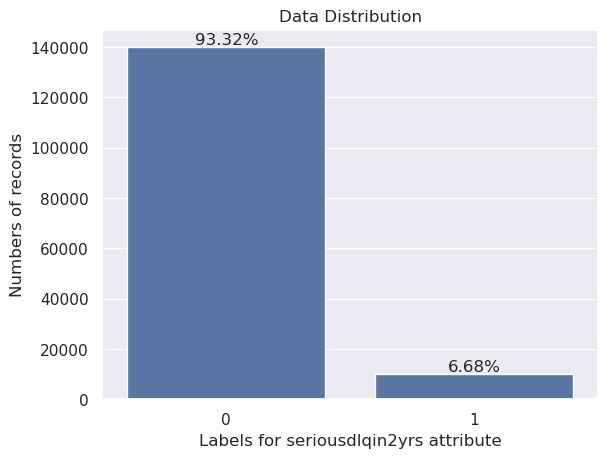

In [46]:
# #지난 2년 동안 심각한 연체 기록이 있는 사람 비율 그리기 
sns.set()

# sns.countplot을 호출할 때 'x'와 'data'를 키워드 인자로 사용
sns.countplot(x='seriousdlqin2yrs', data=training_data).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    # total_len을 계산하기 위해 len() 함수를 사용
    total_len = len(training_data['seriousdlqin2yrs'])
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height / total_len)),
            fontsize=12, ha='center', va='bottom')
# sns.set(font_scale=1.5)를 호출하기 전에 그래프 설정을 완료합니다.
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()


### Missing values

In [12]:
# None 처리 된 데이터가 몇개 있는지 확인
numberOfNullData = training_data.isnull().sum()

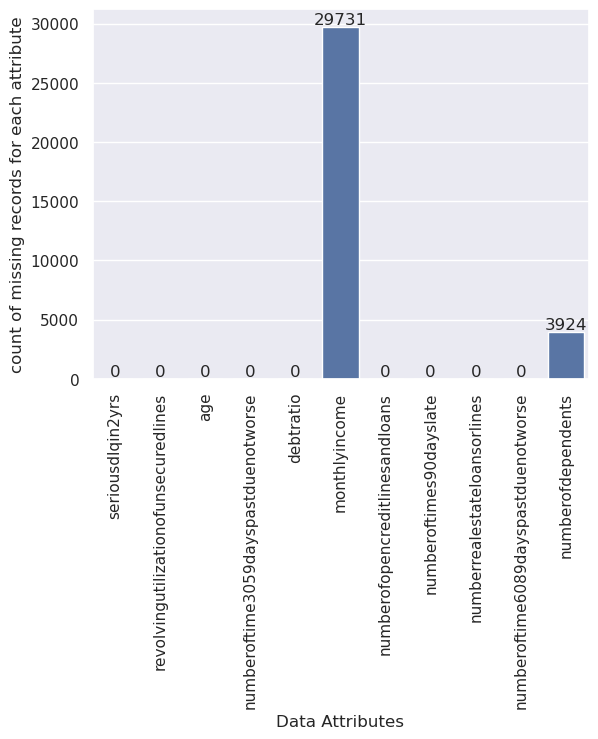

In [48]:
# None 처리된 비율 그리기
# ---------------

x = training_data.columns
y = numberOfNullData

sns.set()
sns.barplot(y)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Null 값 ( = 누락된 데이터) ~> 평균값을 대체 
training_data_mean_replace = training_data.fillna((training_data.mean()))
# training_data_mean_replace.head()

In [23]:
# Null 값 ( = 누락된 데이터) ~> 중앙값을 대체 
training_data_median_replace = training_data.fillna((training_data.median()))
# training_data_median_replace.head()

In [31]:
# training_data 중앙값으로 업데이으
training_data.fillna((training_data.median()), inplace=True)

### 연관성 확인하기 

training_data.columns[1:] 는 SeriousDlqin2yrs 을 제외한 속성들 

corr() 은 상관계수 구하는 메서드 
- 1에 가까울수록 완벽한 양의 선형 관계
- -1에 가까울수록 완벽한 음의 선형 관계
- 0은 변수 간에 선형적 관계가 없음


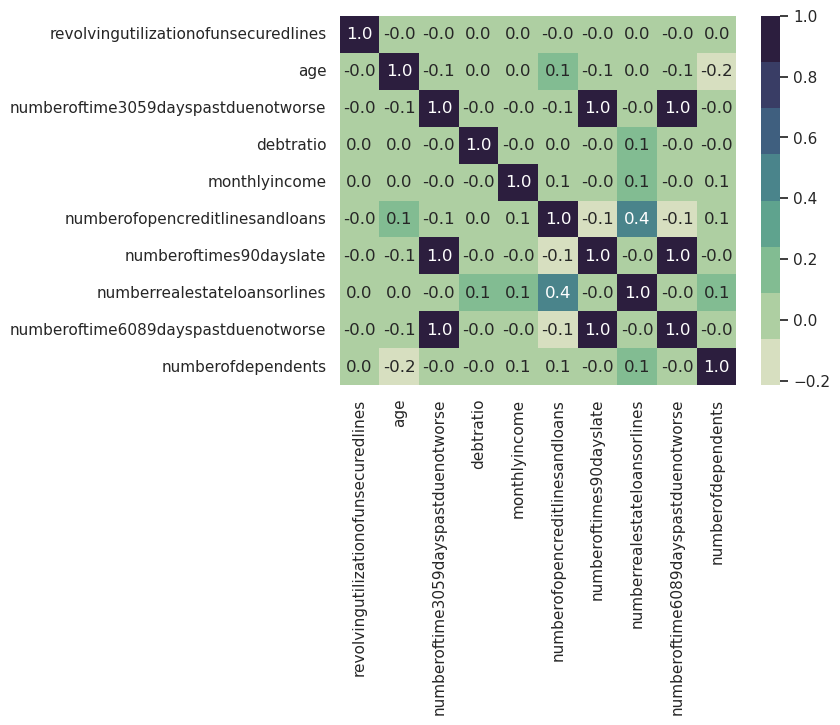

In [40]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

### 이상값 탐지

In [41]:
#  백분위(%) 기반 이상값 처리 메서드 
# --> 상위 k% , 하위 k% 는 이상치 로 판단 

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [44]:
# 중앙값 기준 편차 범위 넘으면 이상값 처리 메서드 
# def mad_based_outlier(points, thresh=3.5):
#     if len(points.shape) == 1:
#         points = points[:,None]
#     median_y = np.median(points, axis=0)
#     median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
#     modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
#                          for y in points]

#     return modified_z_score 
# mad_based_outlier(points=training_data.revolvingutilizationofunsecuredlines)